In [83]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import os

from importlib import reload

import small_utilities
reload(small_utilities)
import Block_analysis
reload(Block_analysis)

from Block_analysis import *
from small_utilities import *



In [59]:
def reposition_first(array):
    if len(array.shape) == 2:  # Check if it's 2D
        # Reposition first row to the last
        return np.vstack((array[1:], array[0]))
    elif len(array.shape) == 3:  # Check if it's 3D
        # Reposition first slice to the last
        return np.concatenate((array[1:], array[:1]), axis=0)

In [20]:
work_directory = os.getcwd()

a = np.sort([i for i in os.listdir(work_directory) if os.path.isdir(i)])

# data_dir = [f'{work_directory}/{a}/data/out_{i}/' for i in range(0, 1000, 100)]

file_name = 'bound_fraction.json'

bf_fas_1 = []
bf_fas_2 = []
bf_lig47_1 = []
bf_lig47_2 = []

for i in range(0, 1000, 100):
    bf_fas_1.append(load_json(f'{work_directory}/{a[0]}/data/out_{i}/{file_name}'))
    bf_fas_2.append(load_json(f'{work_directory}/{a[1]}/data/out_{i}/{file_name}'))
    bf_lig47_1.append(load_json(f'{work_directory}/{a[2]}/data/out_{i}/{file_name}'))
    bf_lig47_2.append(load_json(f'{work_directory}/{a[3]}/data/out_{i}/{file_name}'))

bf_fas_1 = np.array([bf_fas_1[i]['0'] for i in range(len(bf_fas_1))])
bf_fas_1 = reposition_first(bf_fas_1)

bf_fas_2 = np.array([bf_fas_2[i]['0'] for i in range(len(bf_fas_2))])
bf_fas_2 = reposition_first(bf_fas_2)

bf_lig47_1 = np.array([bf_lig47_1[i]['0'] for i in range(len(bf_lig47_1))])
bf_lig47_1 = reposition_first(bf_lig47_1)

bf_lig47_2 = np.array([bf_lig47_2[i]['0'] for i in range(len(bf_lig47_2))])
bf_lig47_2 = reposition_first(bf_lig47_2)

bf_all = np.stack((bf_fas_1, bf_fas_2, bf_lig47_1, bf_lig47_2), axis=0)

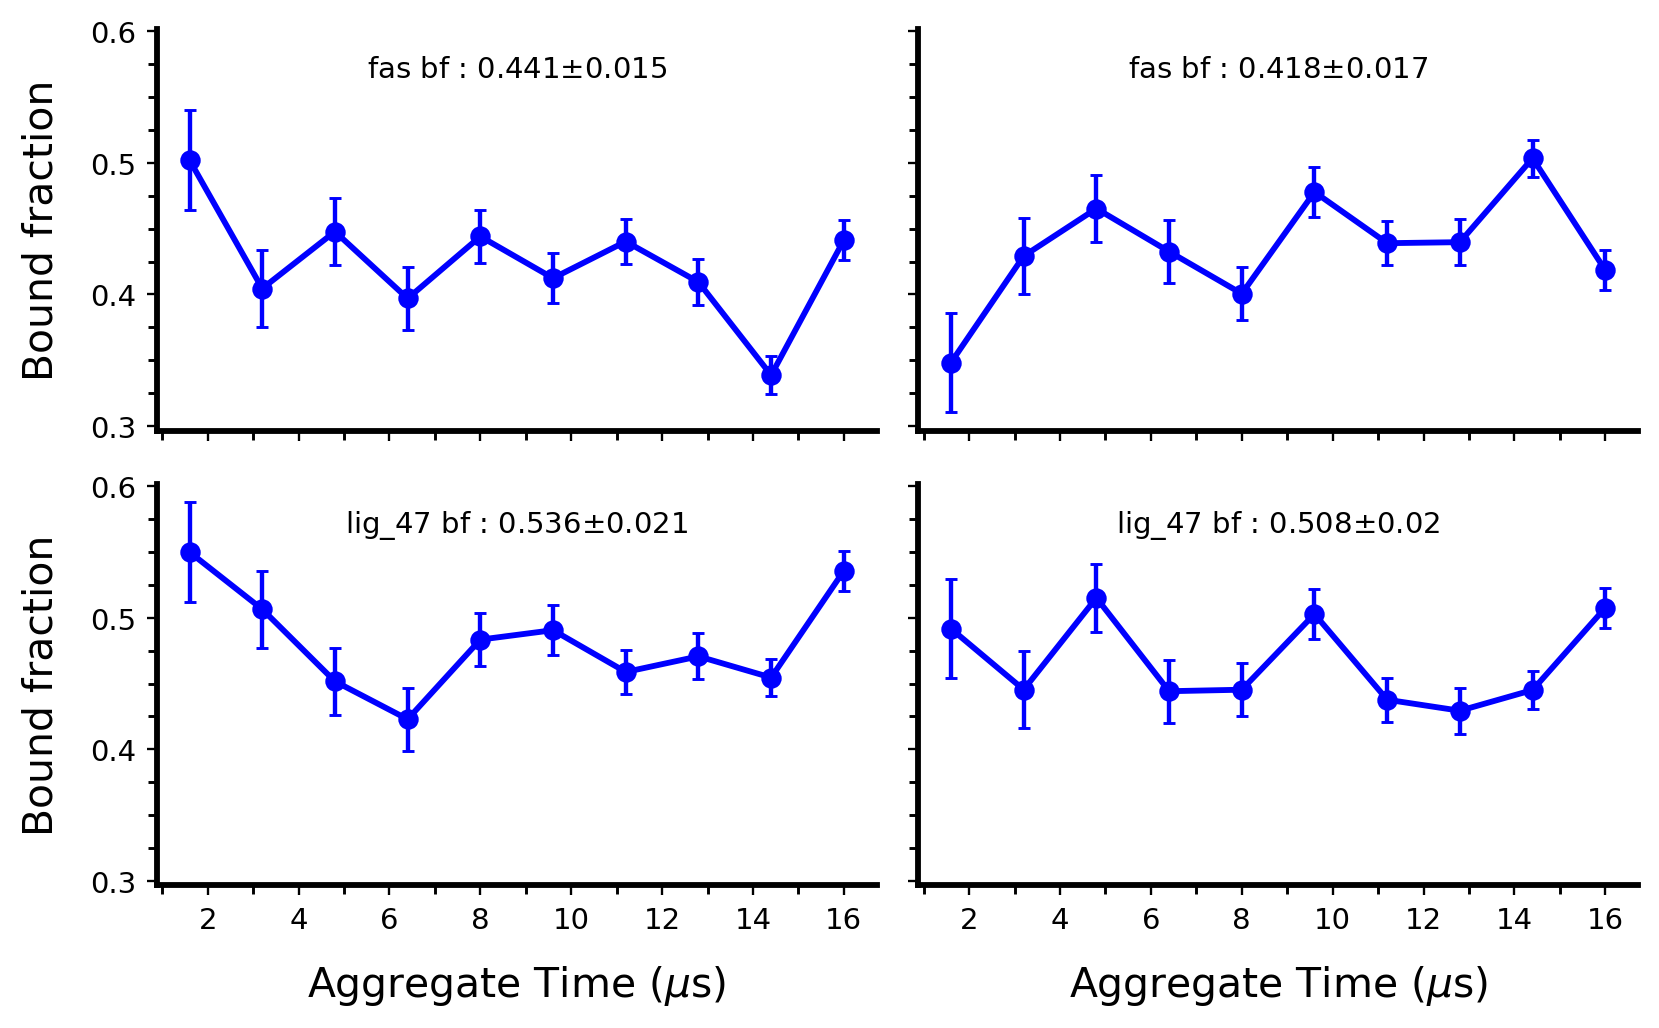

In [26]:
fig, ax = plt.subplots(2,2, figsize=(8,5), dpi=210, sharex=True, sharey=True)  

for i in range(bf_all.shape[0]):

    p,q = np.unravel_index(i,(2,2))
        
    ax[p,q].plot([round((i/1000)*16, 1) for i in range(100,1100,100)],bf_all[i].T[0],  color='blue', lw=2)
    ax[p,q].errorbar([round((i/1000)*16, 1) for i in range(100,1100,100)],bf_all[i].T[0], yerr=bf_all[0].T[1], fmt='o', color='blue', capsize=2)

    ax[p,q].tick_params(axis='both', which='major', labelsize=10)
    # ax[p,q].set_xticks([round(i/1000, 1) for i in range(100,1100,100)])
    # ax[p,q].set_yticks(np.arange(0.32, 0.52, 0.02))
    if q==0 : ax[p,q].set_ylabel('Bound fraction', fontsize=14, labelpad=10)
    if p==1 : ax[p,q].set_xlabel(r'Aggregate Time ($\mu$s)', fontsize=14, labelpad=10)

    ax[p,q].spines['top'].set_visible(False)
    ax[p,q].spines['right'].set_visible(False)
    ax[p,q].spines['bottom'].set_linewidth(2)
    ax[p,q].spines['left'].set_linewidth(2)

    plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(2/2))
    ax[p,q].tick_params(axis='x', which='minor', length=3, width=1, color='k', direction='out')
    plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(0.05/2))
    ax[p,q].tick_params(axis='y', which='minor', length=3, width=1, color='k', direction='out')

    if p!=0 : t=r'lig_47 bf : '
    else : t = r'fas bf : '

    ax[p,q].text(0.5, 0.9, f'{t}{round(bf_all[i].T[0][9],3)}'+r'$\pm$'+f'{round(bf_all[i].T[1][9],3)}', horizontalalignment='center', verticalalignment='center', transform=ax[p,q].transAxes, fontsize=10)
plt.tight_layout()